In [1]:
import pandas as pd

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
from sports_etl.etl.extract import load_team_stats

df = load_team_stats("./data/wnba_gamelogs_2015_2024.csv")  # adjust filename if needed
df.head()

[INFO] Loaded 3942 rows × 41 columns from wnba_gamelogs_2015_2024.csv


,Season,Team,G#,Date,Home,Opp,W/L,Tm_Pts,Opp_Pts,Tm_FG,Tm_FGA,Tm_FG%,Tm_3P,Tm_3PA,Tm_3P%,Tm_FT,Tm_FTA,Tm_FT%,Tm_ORB,Tm_TRB,Tm_AST,Tm_STL,Tm_BLK,Tm_TOV,Tm_PF,Opp_FG,Opp_FGA,Opp_FG%,Opp_3P,Opp_3PA,Opp_3P%,Opp_FT,Opp_FTA,Opp_FT%,Opp_ORB,Opp_TRB,Opp_AST,Opp_STL,Opp_BLK,Opp_TOV,Opp_PF
0,2015,ATL,1,2015-06-05,0,NYL,L,73,82,24,67,0.358,7,20,0.350,18,22,0.818,12,34,15,8,3,19,22,29,60,0.483,3,15,0.200,21,26,0.808,4,32,16,13,4,15,20
1,2015,ATL,2,2015-06-07,1,CON,L,70,75,25,68,0.368,3,16,0.188,17,18,0.944,17,51,13,4,5,25,20,28,71,0.394,7,21,0.333,12,19,0.632,8,25,14,18,3,11,24
2,2015,ATL,3,2015-06-11,1,SAS,W,72,69,28,76,0.368,3,13,0.231,13,18,0.722,20,41,12,10,5,15,25,23,62,0.371,7,24,0.292,16,18,0.889,8,29,19,6,7,17,18
3,2015,ATL,4,2015-06-12,0,WAS,W,64,61,24,62,0.387,7,18,0.389,9,10,0.900,8,34,15,10,1,16,16,23,63,0.365,5,16,0.313,10,12,0.833,11,32,15,7,2,15,18
4,2015,ATL,5,2015-06-14,0,CON,L,64,82,26,64,0.406,3,13,0.231,9,12,0.750,10,26,16,15,1,24,10,34,59,0.576,9,17,0.529,5,6,0.833,6,26,17,13,0,23,16


In [4]:
df_25 = load_team_stats("./data/wnba_gamelogs_2025_1stQtr.csv")
df_25.head()

[INFO] Loaded 154 rows × 41 columns from wnba_gamelogs_2025_1stQtr.csv


,Season,Team,G#,Date,Home,Opp,W/L,Tm_Pts,Opp_Pts,Tm_FG,Tm_FGA,Tm_FG%,Tm_3P,Tm_3PA,Tm_3P%,Tm_FT,Tm_FTA,Tm_FT%,Tm_ORB,Tm_TRB,Tm_AST,Tm_STL,Tm_BLK,Tm_TOV,Tm_PF,Opp_FG,Opp_FGA,Opp_FG%,Opp_3P,Opp_3PA,Opp_3P%,Opp_FT,Opp_FTA,Opp_FT%,Opp_ORB,Opp_TRB,Opp_AST,Opp_STL,Opp_BLK,Opp_TOV,Opp_PF
0,2025,ATL,1,2025-05-16,0,WAS,L,90,94,30,74,0.405,12,36,0.333,18,27,0.667,15,37,24,4,2,14,22,31,61,0.508,9,18,0.500,23,31,0.742,5,26,18,7,4,7,25
1,2025,ATL,2,2025-05-20,0,IND,W,91,90,29,68,0.426,8,30,0.267,25,32,0.781,12,37,19,7,5,11,22,33,68,0.485,8,17,0.471,16,26,0.615,8,32,18,3,3,14,19
2,2025,ATL,3,2025-05-22,1,IND,L,76,81,24,67,0.358,10,29,0.345,18,23,0.783,6,37,14,4,3,12,21,33,74,0.446,7,23,0.304,8,15,0.533,7,41,21,4,3,13,25
3,2025,ATL,4,2025-05-24,1,DAL,W,83,75,29,68,0.426,9,24,0.375,16,21,0.762,11,42,23,6,7,13,13,30,82,0.366,5,23,0.217,10,14,0.714,11,38,17,9,3,8,18
4,2025,ATL,5,2025-05-25,1,CON,W,79,55,29,71,0.408,10,35,0.286,11,14,0.786,12,52,20,4,5,14,14,21,67,0.313,4,15,0.267,9,14,0.643,6,34,14,4,3,9,21


In [5]:
from sports_etl.etl.transform import transform_team_stats_my_dataset

df_clean = transform_team_stats_my_dataset(df)
print(df_clean.head())

df_clean_2025 = transform_team_stats_my_dataset(df_25)

[INFO] Transformed team stats — final shape after deduplication: (3940, 48)
[INFO] Transformed team stats with new features.
[INFO] Transformed team stats — final shape after deduplication: (154, 48)
[INFO] Transformed team stats with new features.


   Season Team  G#        Date  Home  Opp W/L  Tm_Pts  Opp_Pts  Tm_FG  Tm_FGA  \
0    2015  ATL   1  2015-06-05     0  NYL   L      73       82     24      67   
1    2015  ATL   2  2015-06-07     1  CON   L      70       75     25      68   
2    2015  ATL   3  2015-06-11     1  SAS   W      72       69     28      76   
3    2015  ATL   4  2015-06-12     0  WAS   W      64       61     24      62   
4    2015  ATL   5  2015-06-14     0  CON   L      64       82     26      64   

   Tm_FG%  Tm_3P  Tm_3PA  Tm_3P%  Tm_FT  Tm_FTA  Tm_FT%  Tm_ORB  Tm_TRB  \
0   0.358      7      20   0.350     18      22   0.818      12      34   
1   0.368      3      16   0.188     17      18   0.944      17      51   
2   0.368      3      13   0.231     13      18   0.722      20      41   
3   0.387      7      18   0.389      9      10   0.900       8      34   
4   0.406      3      13   0.231      9      12   0.750      10      26   

   Tm_AST  Tm_STL  Tm_BLK  Tm_TOV  Tm_PF  Opp_FG  Opp_FGA  Opp

In [6]:
from sports_etl.etl.load import save_to_csv, save_to_sqlite

# Save to CSV
save_to_csv(df_clean, "./data/teamstats_10_yr_clean.csv")
save_to_csv(df_clean_2025, "./data/teamstats_2025_1stQtr_clean.csv")

# Save to SQLite
# Options for if_exists are "append" or "replace"
save_to_sqlite(df_clean, "./data/teamstats.db", "team_stats_10_yr_clean", if_exists="replace")

[INFO] Saved DataFrame to CSV: data/teamstats_10_yr_clean.csv
[INFO] Saved DataFrame to CSV: data/teamstats_2025_1stQtr_clean.csv
[INFO] Saved DataFrame to SQLite: data/teamstats.db (table: team_stats_10_yr_clean, mode: replace)


In [7]:
print(df_clean.columns.tolist())

['Season', 'Team', 'G#', 'Date', 'Home', 'Opp', 'W/L', 'Tm_Pts', 'Opp_Pts', 'Tm_FG', 'Tm_FGA', 'Tm_FG%', 'Tm_3P', 'Tm_3PA', 'Tm_3P%', 'Tm_FT', 'Tm_FTA', 'Tm_FT%', 'Tm_ORB', 'Tm_TRB', 'Tm_AST', 'Tm_STL', 'Tm_BLK', 'Tm_TOV', 'Tm_PF', 'Opp_FG', 'Opp_FGA', 'Opp_FG%', 'Opp_3P', 'Opp_3PA', 'Opp_3P%', 'Opp_FT', 'Opp_FTA', 'Opp_FT%', 'Opp_ORB', 'Opp_TRB', 'Opp_AST', 'Opp_STL', 'Opp_BLK', 'Opp_TOV', 'Opp_PF', 'win_margin', 'Tm_poss', 'Opp_poss', 'Tm_off_rating', 'Tm_def_rating', 'Tm_tov_rate', 'Opp_tov_rate']


# 3 Pointers 
## Indiana Fever v. New York Liberty, June 14th, 2025

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Quick sanity check
df_clean["Season"].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

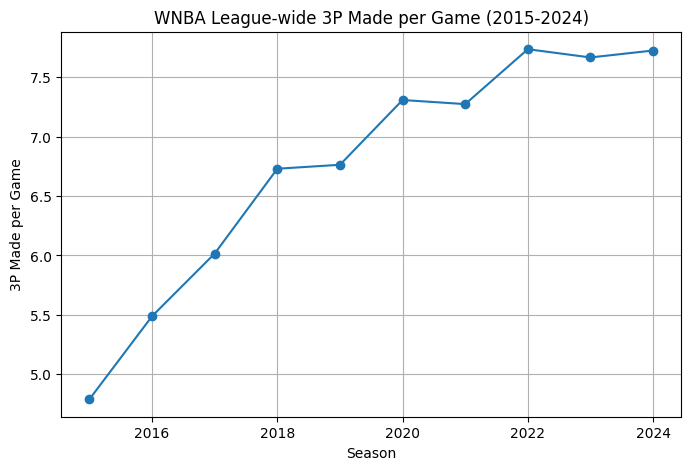

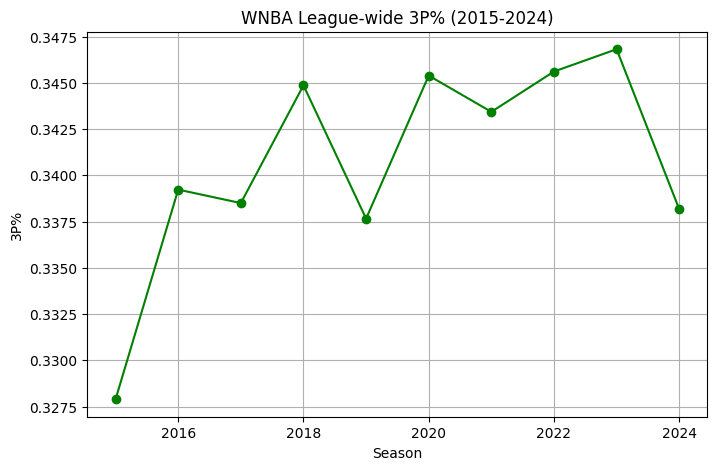

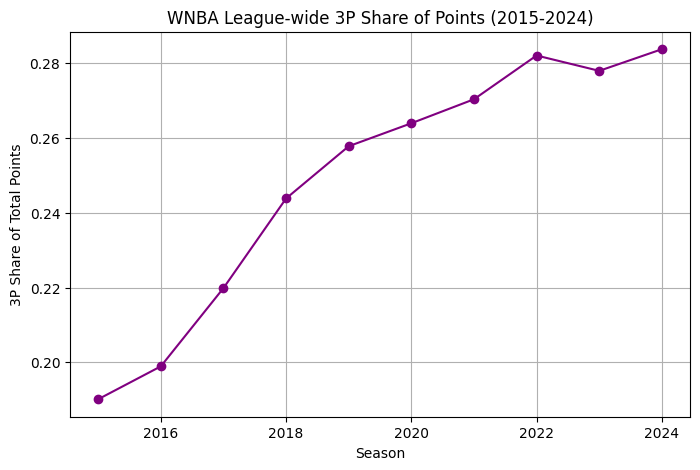

In [10]:
# Aggregate league-wide 3P stats
league_3p_stats = df_clean.groupby("Season").agg({
    "Tm_3P": "sum",
    "Tm_3PA": "sum",
    "Tm_Pts": "sum",
    "G#": "count"
})

# Compute per-game + % metrics
league_3p_stats["3P_Made_per_Game"] = league_3p_stats["Tm_3P"] / league_3p_stats["G#"]
league_3p_stats["3P%"] = league_3p_stats["Tm_3P"] / league_3p_stats["Tm_3PA"]
league_3p_stats["3P_Share_of_Points"] = (league_3p_stats["Tm_3P"] * 3) / league_3p_stats["Tm_Pts"]

# Plot 3P Made per Game
league_3p_stats["3P_Made_per_Game"].plot(marker='o', figsize=(8,5))
plt.title("WNBA League-wide 3P Made per Game (2015-2024)")
plt.ylabel("3P Made per Game")
plt.grid(True)
plt.show()

# Plot 3P%
league_3p_stats["3P%"].plot(marker='o', color='green', figsize=(8,5))
plt.title("WNBA League-wide 3P% (2015-2024)")
plt.ylabel("3P%")
plt.grid(True)
plt.show()

# Plot 3P Share of Points
league_3p_stats["3P_Share_of_Points"].plot(marker='o', color='purple', figsize=(8,5))
plt.title("WNBA League-wide 3P Share of Points (2015-2024)")
plt.ylabel("3P Share of Total Points")
plt.grid(True)
plt.show()

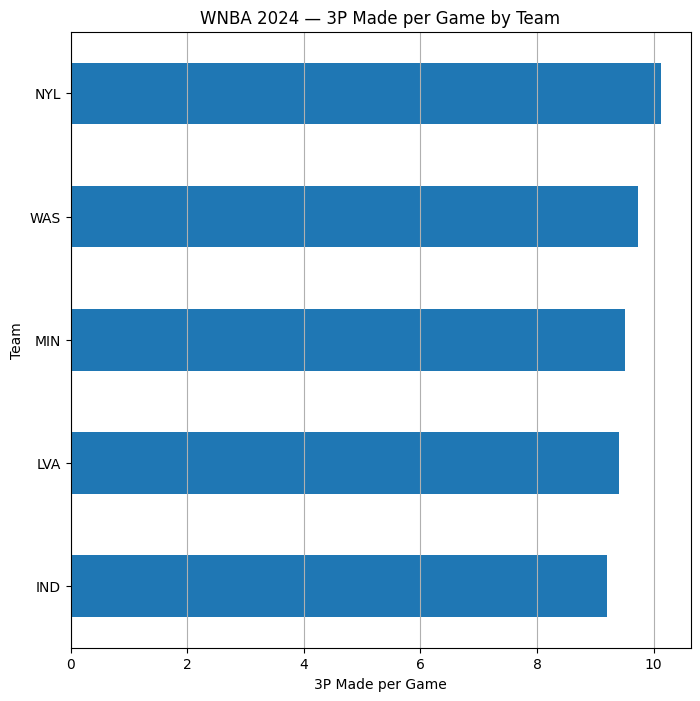

,3P_Made_per_Game,3P%,3P_Share_of_Points
Team,,,
NYL,10.125,0.349138,0.354848
IND,9.200,0.355899,0.324801


In [11]:
# Filter current season — adjust if needed
season = 2024
season_df = df_clean[df_clean["Season"] == season]

# Aggregate team stats
team_3p_stats = season_df.groupby("Team").agg({
    "Tm_3P": "sum",
    "Tm_3PA": "sum",
    "Tm_Pts": "sum",
    "G#": "count"
})

team_3p_stats["3P_Made_per_Game"] = team_3p_stats["Tm_3P"] / team_3p_stats["G#"]
team_3p_stats["3P%"] = team_3p_stats["Tm_3P"] / team_3p_stats["Tm_3PA"]
team_3p_stats["3P_Share_of_Points"] = (team_3p_stats["Tm_3P"] * 3) / team_3p_stats["Tm_Pts"]

# Plot 3P Made per Game → sorted
team_3p_stats["3P_Made_per_Game"].sort_values(ascending=False).head(5).iloc[::-1].plot(kind='barh', figsize=(8,8))
plt.title(f"WNBA {season} — 3P Made per Game by Team")
plt.xlabel("3P Made per Game")
plt.grid(axis='x')
plt.show()

# Liberty vs Fever comparison table
liberty_vs_fever = team_3p_stats.loc[["NYL", "IND"]][["3P_Made_per_Game", "3P%", "3P_Share_of_Points"]]
display(liberty_vs_fever)

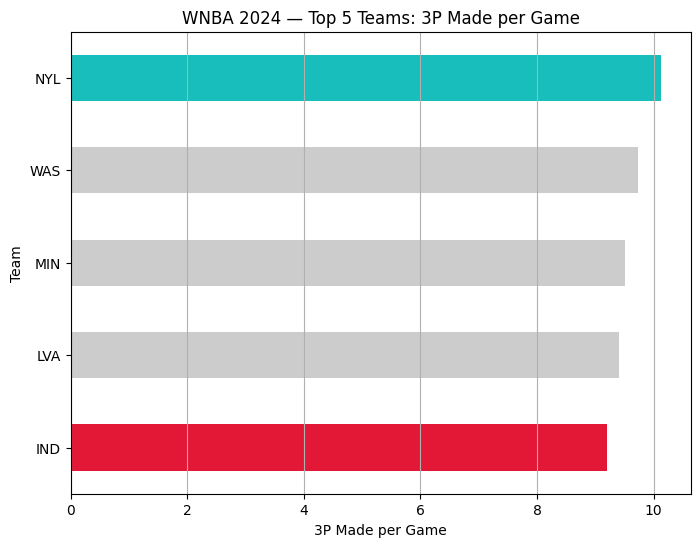

In [12]:
# Define team colors
team_colors = {
    "NYL": "#17BEBB",  # Liberty seafoam green
    "IND": "#E31837",  # Fever red
}

# Get top 5 teams
top5_3p = team_3p_stats["3P_Made_per_Game"].sort_values(ascending=False).head(5)

# Build color list
colors = [
    team_colors.get(team, "#CCCCCC")  # light gray for other teams
    for team in top5_3p.index
]

# Plot (reverse order for top at top)
top5_3p.iloc[::-1].plot(
    kind='barh',
    figsize=(8,6),
    color=colors[::-1]
)

plt.title(f"WNBA {season} — Top 5 Teams: 3P Made per Game")
plt.xlabel("3P Made per Game")
plt.grid(axis='x')
plt.show()

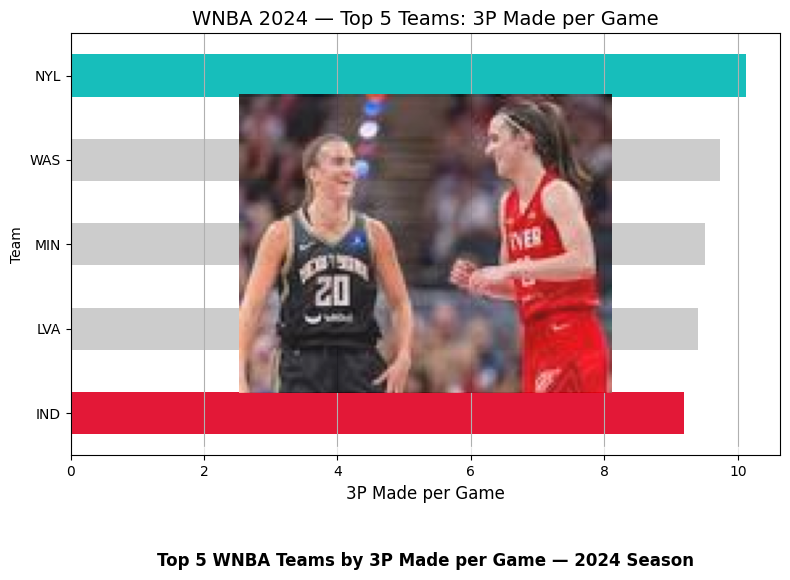

In [13]:
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Rectangle

# Load combined player image
combined_img = mpimg.imread("icons/sabrina_caitlin.png")

# Plot Top 5 barh chart
fig, ax = plt.subplots(figsize=(8,6))

bars = top5_3p.iloc[::-1].plot(
    kind='barh',
    color=colors[::-1],
    ax=ax
)

# Add combined player image at center of chart
# Calculate center of x/y limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()

x_center = (xlim[1] + xlim[0]) / 2
y_center = (ylim[1] + ylim[0]) / 2

# Add image
img = OffsetImage(combined_img, zoom=1.9, alpha=0.9)  # alpha for transparency
ab = AnnotationBbox(img, (x_center, y_center), frameon=False)
ax.add_artist(ab)

# Title and labels
ax.set_title(f"WNBA {season} — Top 5 Teams: 3P Made per Game", fontsize=14)
ax.set_xlabel("3P Made per Game", fontsize=12)
ax.grid(axis='x')

# Add rectangle covering bottom 12% of chart (adjust as needed)
ax.add_patch(
    Rectangle(
        (ax.get_xlim()[0], ax.get_ylim()[0] - 0.5),  # x, y start
        ax.get_xlim()[1] - ax.get_xlim()[0],         # width
        0.6,                                        # height of box
        color='white',
        alpha=0.7,
        zorder=2,
        transform=ax.transData
    )
)

# Add text inside rectangle
ax.text(
    0.5, 
    -0.25,  # position below chart, tweak as needed
    "Top 5 WNBA Teams by 3P Made per Game — 2024 Season",
    ha='center', 
    va='center',
    fontsize=12,
    fontweight='bold',
    color='black',
    transform=ax.transAxes
)

plt.tight_layout()
plt.show()

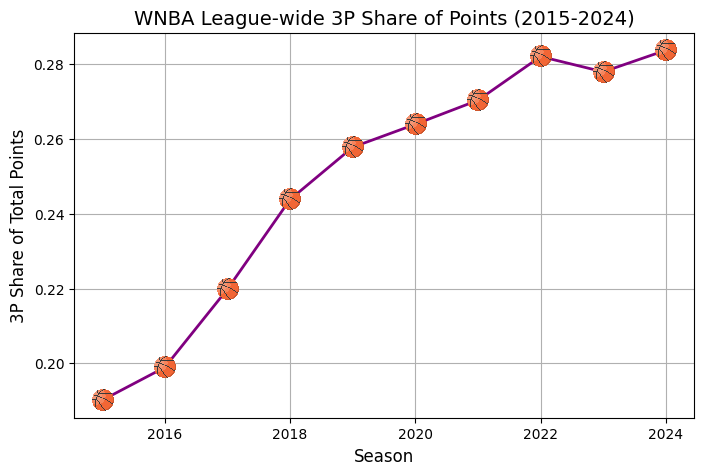

In [14]:
# Plot 3P Share of Points with basketball markers

import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Load your basketball icon
basketball_icon = mpimg.imread("icons/basketball.png")

# Basic line plot first (no markers)
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(
    league_3p_stats.index,
    league_3p_stats["3P_Share_of_Points"],
    color='purple',
    linewidth=2
)

# Add basketball icons as markers
for x, y in zip(league_3p_stats.index, league_3p_stats["3P_Share_of_Points"]):
    imagebox = OffsetImage(basketball_icon, zoom=0.03)  # adjust zoom as needed
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)

# Style the plot
ax.set_title("WNBA League-wide 3P Share of Points (2015-2024)", fontsize=14)
ax.set_ylabel("3P Share of Total Points", fontsize=12)
ax.set_xlabel("Season", fontsize=12)
ax.grid(True)

plt.show()

In [15]:
pwd

'/home/maxkennebrew/projects/sports_etl_project'

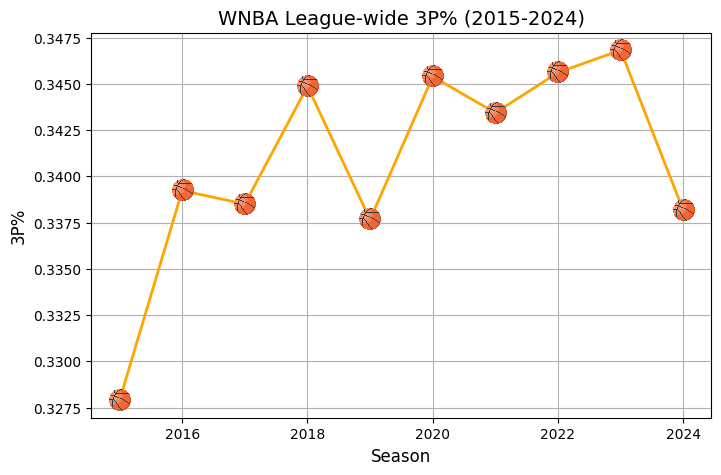

In [16]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

# Load image
basketball_icon = mpimg.imread("./icons/basketball.png")

fig, ax = plt.subplots(figsize=(8,5))

# Plot line without markers first
ax.plot(league_3p_stats.index, league_3p_stats["3P%"], color='orange', linewidth=2)

# Add basketball icon at each point
for x, y in zip(league_3p_stats.index, league_3p_stats["3P%"]):
    imagebox = OffsetImage(basketball_icon, zoom=0.03)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)

ax.set_title("WNBA League-wide 3P% (2015-2024)", fontsize=14)
ax.set_ylabel("3P%", fontsize=12)
ax.set_xlabel("Season", fontsize=12)
ax.grid(True)
plt.show()

| Color Name | Hex Code  | 
| ---------- | --------- | 
| **Black**  | `#050707` | 
| **Gray**   | `#4C4C4D` | 
| **Cream**  | `#EFE3C6` | 
| **Orange** | `#F57B20` | 

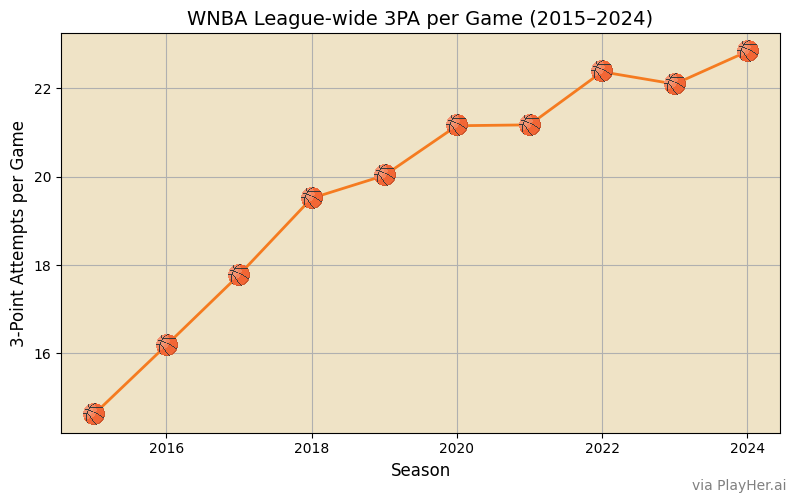

In [17]:
# Calculate 3PA per game if not already done
league_3p_stats["3PA_per_Game"] = league_3p_stats["Tm_3PA"] / league_3p_stats["G#"]

# Load basketball icon
basketball_icon = mpimg.imread("icons/basketball.png")

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))

# Change axes (plot area) background color
ax.set_facecolor('#EFE3C6')

# Line plot
ax.plot(
    league_3p_stats.index,
    league_3p_stats["3PA_per_Game"],
    color="#F57B20",
    linewidth=2
)

# Add basketball markers
for x, y in zip(league_3p_stats.index, league_3p_stats["3PA_per_Game"]):
    imagebox = OffsetImage(basketball_icon, zoom=0.03)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)

# Labels & Title
ax.set_title("WNBA League-wide 3PA per Game (2015–2024)", fontsize=14)
ax.set_ylabel("3-Point Attempts per Game", fontsize=12)
ax.set_xlabel("Season", fontsize=12)
ax.grid(True)

# ✅ Add watermark (bottom right)
plt.figtext(0.99, 0.01, "via PlayHer.ai", ha="right", fontsize=10, color="gray")

plt.tight_layout()
plt.show()


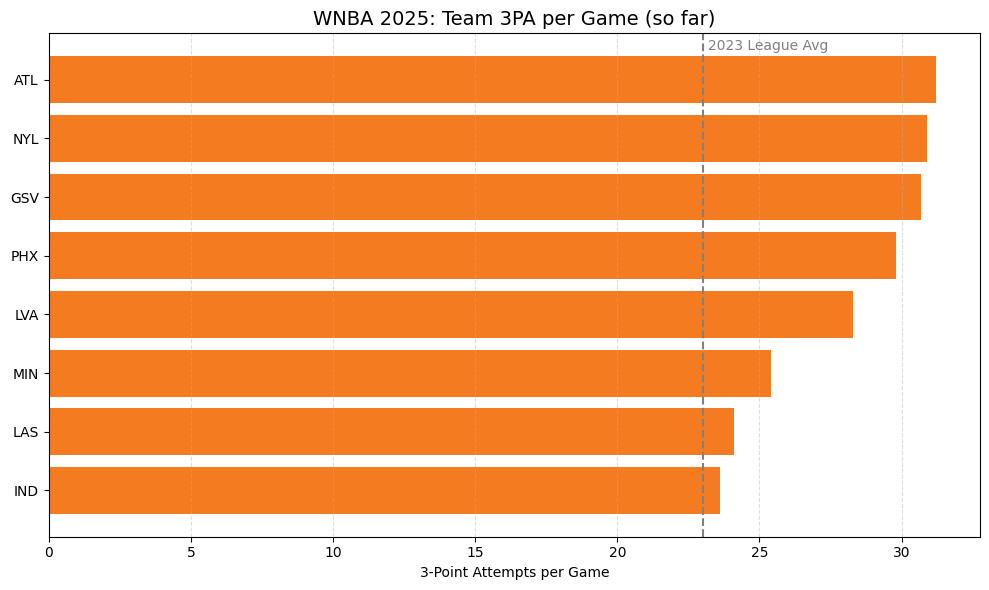

In [18]:
import matplotlib.pyplot as plt

# Teams and their current 3PA values
teams = [
    "ATL", "NYL", "GSV", "PHX", "LVA", "MIN", "LAS", "IND"
]
three_pa = [31.2, 30.9, 30.7, 29.8, 28.3, 25.4, 24.1, 23.6]

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.barh(teams, three_pa, color="#F57B20")  # WNBA orange

# Mark league average line from 2023
ax.axvline(x=23, color="gray", linestyle="--", linewidth=1.5)
ax.text(23.2, -0.5, "2023 League Avg", color="gray", fontsize=10)

# Titles and labels
ax.set_title("WNBA 2025: Team 3PA per Game (so far)", fontsize=14)
ax.set_xlabel("3-Point Attempts per Game")
ax.invert_yaxis()  # top team first
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Quarter 1 Report

In [19]:
df_clean_2024 = df_clean[df_clean['Season'] == 2024].copy()

In [20]:
quarter1 = df_clean_2025[df_clean_2025['G#'] <= 11]

q1_3p_stats = (
    quarter1.groupby('Team')[['Tm_3P', 'Tm_3PA']]
    .sum()
    .assign(ThreePCT=lambda x: x['Tm_3P'] / x['Tm_3PA'] * 100)
    .sort_values('ThreePCT', ascending=False)
)

print(q1_3p_stats.head(13))

      Tm_3P  Tm_3PA   ThreePCT
Team                          
MIN     108     279  38.709677
SEA      77     209  36.842105
IND      96     262  36.641221
NYL     117     331  35.347432
LAS      95     274  34.671533
LVA     103     307  33.550489
PHO     108     325  33.230769
ATL     112     343  32.653061
WAS      60     188  31.914894
DAL      72     229  31.441048
CHI      70     233  30.042918
CON      65     230  28.260870
GSV      89     327  27.217125


In [21]:
q1_3pa_volume = q1_3p_stats.sort_values('Tm_3PA', ascending=False)
print(q1_3pa_volume.head(13))

      Tm_3P  Tm_3PA   ThreePCT
Team                          
ATL     112     343  32.653061
NYL     117     331  35.347432
GSV      89     327  27.217125
PHO     108     325  33.230769
LVA     103     307  33.550489
MIN     108     279  38.709677
LAS      95     274  34.671533
IND      96     262  36.641221
CHI      70     233  30.042918
CON      65     230  28.260870
DAL      72     229  31.441048
SEA      77     209  36.842105
WAS      60     188  31.914894


In [24]:
q1_2024 = df_clean_2024[df_clean_2024['G#'] <= 11]
q1_2024_stats = (
    q1_2024.groupby('Team')[['Tm_3P', 'Tm_3PA']]
    .sum()
    .assign(ThreePCT_2024=lambda x: x['Tm_3P'] / x['Tm_3PA'] * 100)
)

q1_combined = q1_3p_stats.join(q1_2024_stats[['ThreePCT_2024']])
q1_combined['Improvement'] = q1_combined['ThreePCT'] - q1_combined['ThreePCT_2024']
print(q1_combined.sort_values('Improvement', ascending=False).head(13))

      Tm_3P  Tm_3PA   ThreePCT  ThreePCT_2024  Improvement
Team                                                      
SEA      77     209  36.842105      30.841121     6.000984
IND      96     262  36.641221      31.460674     5.180547
NYL     117     331  35.347432      31.629393     3.718039
LAS      95     274  34.671533      32.669323     2.002210
DAL      72     229  31.441048      29.569892     1.871156
CHI      70     233  30.042918      30.246914    -0.203995
PHO     108     325  33.230769      33.436533    -0.205763
WAS      60     188  31.914894      32.167832    -0.252939
ATL     112     343  32.653061      33.484163    -0.831102
LVA     103     307  33.550489      34.603175    -1.052686
MIN     108     279  38.709677      40.484429    -1.774752
CON      65     230  28.260870      30.319149    -2.058279
GSV      89     327  27.217125            NaN          NaN


In [36]:
team_stddev = (
    quarter1.assign(ThreePCT=lambda x: x['Tm_3P'] / x['Tm_3PA'] * 100)
    .groupby('Team')['ThreePCT']
    .std()
    .sort_values()
)

print(team_stddev.head(13))

Team
ATL     5.641944
MIN     6.427087
LVA     7.319594
GSV     7.430895
CHI     7.524330
LAS     7.964517
DAL     8.416777
IND     9.096828
CON    10.285393
PHO    10.325025
WAS    12.209876
NYL    13.172639
SEA    13.250277
Name: ThreePCT, dtype: float64


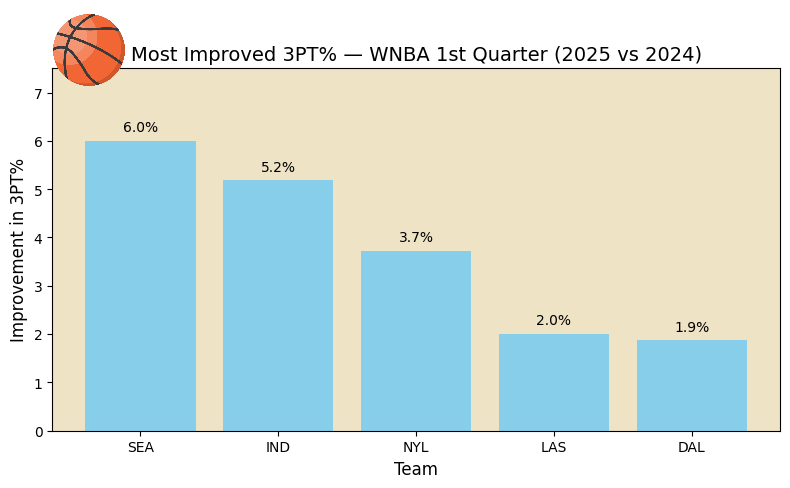

In [26]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))

# Background color
ax.set_facecolor('#EFE3C6')

top_improved = q1_combined.sort_values("Improvement", ascending=False).head(5)

# Plot bars
bars = ax.bar(top_improved.index, top_improved["Improvement"], color="skyblue")

# Add value labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f"{yval:.1f}%", ha="center", fontsize=10)

# Title without emoji
ax.set_title("Most Improved 3PT% — WNBA 1st Quarter (2025 vs 2024)", fontsize=14)
ax.set_ylabel("Improvement in 3PT%", fontsize=12)
ax.set_xlabel("Team", fontsize=12)
ax.set_ylim(0, top_improved["Improvement"].max() + 1.5)

# Load your basketball image
img = mpimg.imread("/home/maxkennebrew/projects/sports_etl_project/icons/basketball.png")
imagebox = OffsetImage(img, zoom=0.1)

# Place it next to the title (adjust xy coords as needed)
ab = AnnotationBbox(imagebox, (0.05, 1.05), xycoords='axes fraction', frameon=False)
ax.add_artist(ab)

plt.tight_layout()
plt.show()

In [27]:
import os
from PIL import Image

logo_dir = "/home/maxkennebrew/projects/sports_etl_project/icons"

for fname in os.listdir(logo_dir):
    ext = os.path.splitext(fname)[1].lower()
    if ext in [".gif", ".webp"]:
        path = os.path.join(logo_dir, fname)
        png_path = os.path.join(logo_dir, os.path.splitext(fname)[0] + ".png")
        try:
            im = Image.open(path).convert("RGBA")  # ensure transparency is preserved
            im.save(png_path, format="PNG")
            print(f"✅ Converted {fname} → {os.path.basename(png_path)}")
        except Exception as e:
            print(f"❌ Failed to convert {fname}: {e}")

✅ Converted gabby_williams.webp → gabby_williams.png


In [28]:
wnba_teams = {
    "ATL": "Atlanta Dream",
    "CHI": "Chicago Sky",
    "CON": "Connecticut Sun",
    "DAL": "Dallas Wings",
    "GSV": "Golden State Valkyries",
    "IND": "Indiana Fever",
    "LAS": "Los Angeles Sparks",
    "LVA": "Las Vegas Aces",
    "MIN": "Minnesota Lynx",
    "NYL": "New York Liberty",
    "PHO": "Phoenix Mercury",
    "SEA": "Seattle Storm",
    "WAS": "Washington Mystics"
}

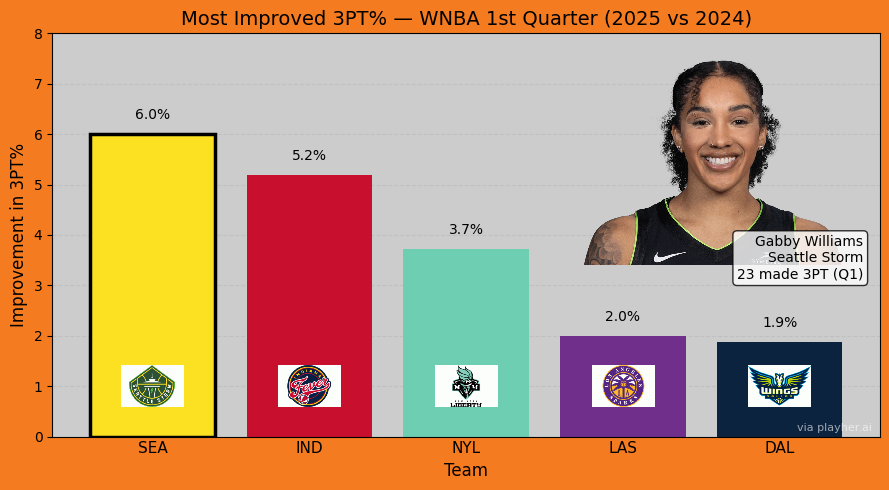

In [29]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

# Set team colors
team_colors = {
    "SEA": "#FBE122",
    "IND": "#C8102E",
    "NYL": "#6ECEB2",
    "LAS": "#702F8A",
    "DAL": "#0c2340"
}

# Set team logos (adjust paths to your setup)
team_logos = {
    "SEA": "/home/maxkennebrew/projects/sports_etl_project/icons/SEA.png",
    "IND": "/home/maxkennebrew/projects/sports_etl_project/icons/IND.png",
    "NYL": "/home/maxkennebrew/projects/sports_etl_project/icons/NYL.png",
    "LAS": "/home/maxkennebrew/projects/sports_etl_project/icons/LAS.png",
    "DAL": "/home/maxkennebrew/projects/sports_etl_project/icons/DAL.png"
}

# Get teams and improvements
teams = top_improved.index
improvements = top_improved["Improvement"]

# Plot
fig, ax = plt.subplots(figsize=(9, 5))
bars = ax.bar(teams, improvements, color=[team_colors[t] for t in teams])
bars[0].set_edgecolor("black")
bars[0].set_linewidth(2.5)
ax.set_facecolor('#CCCCCC')
fig.patch.set_facecolor('#F57B20')


# Add percentage labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f"{yval:.1f}%", ha='center', fontsize=10)

# Add team logos at base of each bar
for i, team in enumerate(teams):
    logo_path = team_logos.get(team)
    if logo_path:
        img = mpimg.imread(logo_path)
        imagebox = OffsetImage(img, zoom=0.3)  # Adjust zoom as needed
        ab = AnnotationBbox(imagebox, (i, 1),  # ← Put logo at y=1 on the bar
                    xycoords='data', frameon=False)
        ax.add_artist(ab)

# Load and add Alysha Clark image to the top-right corner
gabby_img = mpimg.imread("/home/maxkennebrew/projects/sports_etl_project/icons/gabby_williams.png")
gabby_box = OffsetImage(gabby_img, zoom=0.2)  # Adjust zoom for size

# Place in top-right of the axis (1.0, 1.0 = top-right corner)
ab = AnnotationBbox(gabby_box, (0.98, 0.95),
                    xycoords='axes fraction',
                    frameon=False,
                    box_alignment=(1, 1))  # aligns the image's top-right with that corner

ax.add_artist(ab)

# Add text just under Gabby Williams' image (in axes fraction coords)
ax.text(
    0.98, 0.50,  # slightly lower than the image
    "Gabby Williams\nSeattle Storm\n23 made 3PT (Q1)",
    fontsize=10,
    color='black',        # or 'white' depending on your background
    ha='right',           # align to the right edge
    va='top',
    transform=ax.transAxes,
    bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3')  # optional background
)

# Watermark
ax.text(
    0.99, 0.01,
    "via playher.ai",
    fontsize=8,
    color='white',
    ha='right',
    va='bottom',
    transform=ax.transAxes,
    alpha=0.6
)

# Styling
ax.set_title("Most Improved 3PT% — WNBA 1st Quarter (2025 vs 2024)", fontsize=14)
ax.set_ylabel("Improvement in 3PT%", fontsize=12)
ax.set_ylim(0, improvements.max() + 2)
ax.set_xlabel("Team", fontsize=12)
ax.tick_params(axis='x', length=0)  # remove tick lines
ax.set_xticks(range(len(teams)))
ax.set_xticklabels(teams, fontsize=11)
ax.yaxis.grid(True, linestyle='--', alpha=0.4)
ax.set_axisbelow(True)  # grid behind bars


plt.tight_layout()
# Optional: Save
# plt.savefig("most_improved_3pt_wnba_q1_2025.png", dpi=300, bbox_inches='tight')

plt.show()

In [35]:
# Filter to first 11 games
q1 = df_clean_2025[df_clean_2025['G#'] <= 11].copy()

# Calculate 3PT points per game
q1['Points_from_3P'] = q1['Tm_3P'] * 3

# Group by team and sum
q1_team_totals = (
    q1.groupby('Team')[['Points_from_3P', 'Tm_Pts']]
    .sum()
    .assign(ThreeP_Share=lambda x: x['Points_from_3P'] / x['Tm_Pts'] * 100)
    .sort_values('ThreeP_Share', ascending=False)
)

# Show top 5 teams
top5_threept_share = q1_team_totals[['ThreeP_Share']].head(5)
print(top5_threept_share)

print("-----------------------------------------")

bottom5_threept_share = q1_team_totals[['ThreeP_Share']].tail(5)
print(bottom5_threept_share)

      ThreeP_Share
Team              
PHO      36.860068
ATL      36.090226
NYL      35.526316
LVA      35.517241
MIN      34.285714
-----------------------------------------
      ThreeP_Share
Team              
SEA      26.042841
CHI      25.362319
CON      24.872449
DAL      24.107143
WAS      21.126761


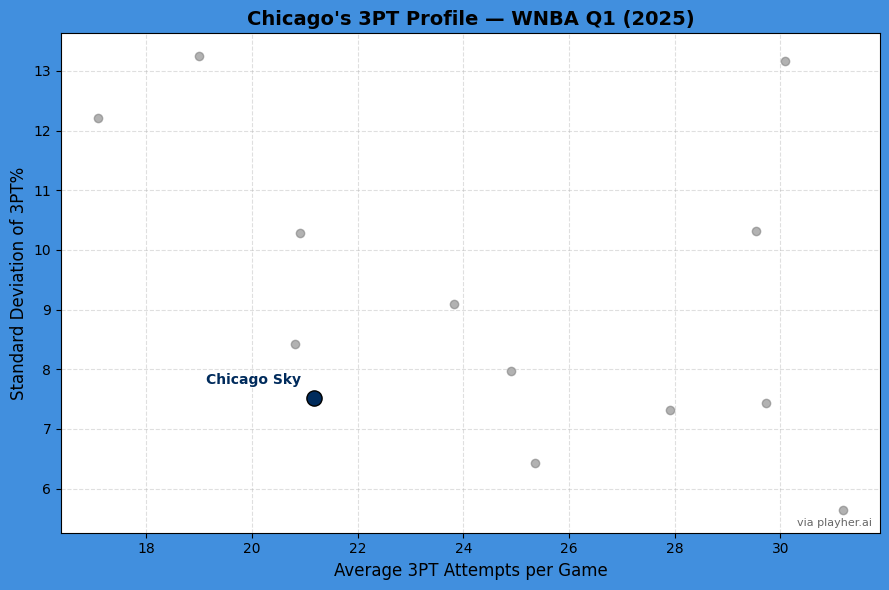

In [39]:
import matplotlib.pyplot as plt

# Step 1: Compute 3PA per game
threepa_per_game = (
    quarter1.groupby('Team')['Tm_3PA']
    .mean()
    .rename("Avg_3PA")
)

# Step 2: Compute standard deviation of 3PT%
threepct_std = (
    quarter1.assign(ThreePCT=lambda x: x['Tm_3P'] / x['Tm_3PA'] * 100)
    .groupby('Team')['ThreePCT']
    .std()
    .rename("3P%_STD")
)

# Step 3: Combine into single DataFrame
threept_profile = pd.concat([threepa_per_game, threepct_std], axis=1)

# Step 4: Plot
fig, ax = plt.subplots(figsize=(9, 6))
fig.patch.set_facecolor('#418FDE')
ax.set_facecolor("#FFFFFF")

# Plot all teams
ax.scatter(threept_profile["Avg_3PA"], threept_profile["3P%_STD"], color="gray", alpha=0.6)

# Highlight Chicago
chicago = threept_profile.loc["CHI"]
ax.scatter(chicago["Avg_3PA"], chicago["3P%_STD"], color="#002B5C", s=120, label="Chicago Sky", edgecolors='black', zorder=3)

# Annotate Chicago
ax.annotate("Chicago Sky", 
            (chicago["Avg_3PA"], chicago["3P%_STD"]), 
            textcoords="offset points", 
            xytext=(-10, 10), 
            ha='right',
            fontsize=10,
            weight='bold',
            color="#002B5C")

# Titles and labels
ax.set_title("Chicago's 3PT Profile — WNBA Q1 (2025)", fontsize=14, weight='bold')
ax.set_xlabel("Average 3PT Attempts per Game", fontsize=12)
ax.set_ylabel("Standard Deviation of 3PT%", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.4)

# Watermark
ax.text(0.99, 0.01, "via playher.ai", fontsize=8, ha='right', va='bottom', transform=ax.transAxes, alpha=0.6)

plt.tight_layout()
plt.show()

# Post Sat June 21st Morning

🏀 1st Quarter Report: The Sky’s Steady Stroke
(Use this or slightly tweak it for each Q1 series post)

⏱️ End of Q1 and we’re headed to the bench with something to talk about...

While the league trends toward high-volume, high-powered 3PT offenses, the @chicagosky are taking a different approach — and it’s working… in their own way.

Chicago ranks in the bottom five for both 3PT attempts and % of total points from beyond the arc.

But this chart tells the real story.
Of all WNBA teams, Chicago is one of the most consistent 3-point shooting squads in the league so far. Low volume, but steady. Reliable. Efficient.

And here’s the twist: they don’t even need a massive strategy overhaul to level up.

🔹 Kia Nurse and Rachel Banham are each hitting just under 1.5 threes per game on ~4 attempts — nearly identical to elite shooters like Rhyne Howard and Sabrina Ionescu.

If the Sky choose to scale up those attempts just slightly — while maintaining their consistency — they could reshape their offensive identity without abandoning their core style.

📊 Efficiency + Trust = Potential.

#WNBA #ChicagoSky #Q1Report #3PointThreat #KiaNurse #RachelBanham #RhyneHoward #SabrinaIonescu #BasketballAnalytics #playherai

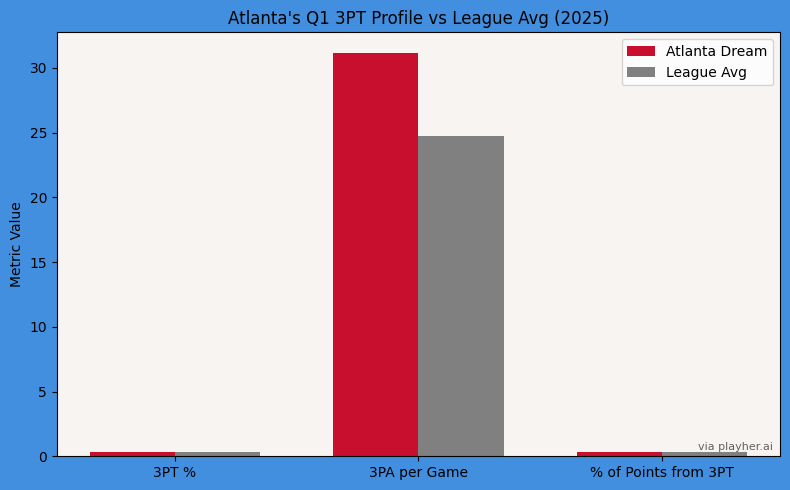

In [44]:
# League averages
league_q1 = quarter1.groupby('Team')[['Tm_3P', 'Tm_3PA', 'Tm_Pts']].sum()
league_q1['3PT%'] = league_q1['Tm_3P'] / league_q1['Tm_3PA']
league_q1['3PT_Share'] = (league_q1['Tm_3P'] * 3) / league_q1['Tm_Pts']

atl_stats = league_q1.loc['ATL']
league_avg = league_q1.mean()

# Bar chart comparing ATL vs league average
import matplotlib.pyplot as plt

metrics = ['3PT%', 'Tm_3PA', '3PT_Share']
labels = ['3PT %', '3PA per Game', '% of Points from 3PT']
atl_vals = [atl_stats['3PT%'], atl_stats['Tm_3PA']/11, atl_stats['3PT_Share']]
league_vals = [league_avg['3PT%'], league_avg['Tm_3PA']/11, league_avg['3PT_Share']]

x = range(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x, atl_vals, width, label='Atlanta Dream', color='#C8102E')
ax.bar([p + width for p in x], league_vals, width, label='League Avg', color='gray')

ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.set_title("Atlanta's Q1 3PT Profile vs League Avg (2025)")
ax.legend()
ax.set_ylabel("Metric Value")
ax.set_facecolor("#F8F4F2")
fig.patch.set_facecolor("#418FDE")
ax.text(0.99, 0.01, "via playher.ai", transform=ax.transAxes, ha='right', va='bottom', fontsize=8, alpha=0.6)

plt.tight_layout()
plt.show()

# Post Friday June 20th, Early Afternoon

🏀 Q1 Report: The Dream Are Shooting Like Contenders
Atlanta isn’t just in the Commissioner's Cup mix — they’ve got the 3-point game to back it up.

Compared to league averages, ATL is shooting better, taking more 3s, and scoring a larger share of their points from beyond the arc.

🔥 Add in Rhyne Howard’s deep-range rhythm, and this is a team that can stretch defenses every night.

#WNBA #AtlantaDream #Q1Report #3PointThreat #StatWatch #playherai

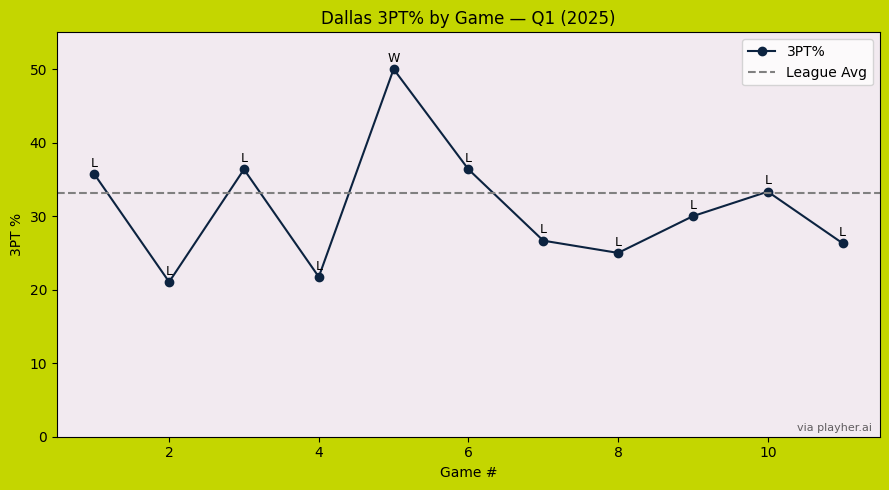

In [48]:
dal_q1 = quarter1[quarter1['Team'] == 'DAL'].copy()
dal_q1['ThreePCT'] = dal_q1['Tm_3P'] / dal_q1['Tm_3PA'] * 100

fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(dal_q1['G#'], dal_q1['ThreePCT'], marker='o', color='#0c2340', label='3PT%')
ax.axhline(y=league_q1['Tm_3P'].sum()/league_q1['Tm_3PA'].sum()*100, linestyle='--', color='gray', label='League Avg')

# Optionally add W/L markers
for _, row in dal_q1.iterrows():
    result = 'W' if row['W/L'] == 'W' else 'L'
    ax.text(row['G#'], row['ThreePCT'] + 1, result, ha='center', fontsize=9)

ax.set_title("Dallas 3PT% by Game — Q1 (2025)")
ax.set_xlabel("Game #")
ax.set_ylabel("3PT %")
ax.set_ylim(0, max(dal_q1['ThreePCT'].max(), 40) + 5)
ax.legend()
ax.set_facecolor("#F2EAF0")
fig.patch.set_facecolor("#c4d600")
ax.text(0.99, 0.01, "via playher.ai", transform=ax.transAxes, ha='right', va='bottom', fontsize=8, alpha=0.6)

plt.tight_layout()
plt.show()

# Post Friday June 20th, Early Afternoon

🚫 Q1 Report: What’s Grounding the Wings?
Dallas is showing 3PT improvement — they're in the top 5 in percentage gain from last season.

But here's the issue: they’re still near the bottom in attempts, makes, and overall offensive 3PT impact.

The consistency isn’t there yet, and it’s showing in the standings. Just 2 wins through 11 games.

Until the Wings unlock more efficient deep shooting — or lean into second-chance looks — they’ll struggle to rise.

#WNBA #DallasWings #Q1Report #3PTChallenge #playherai

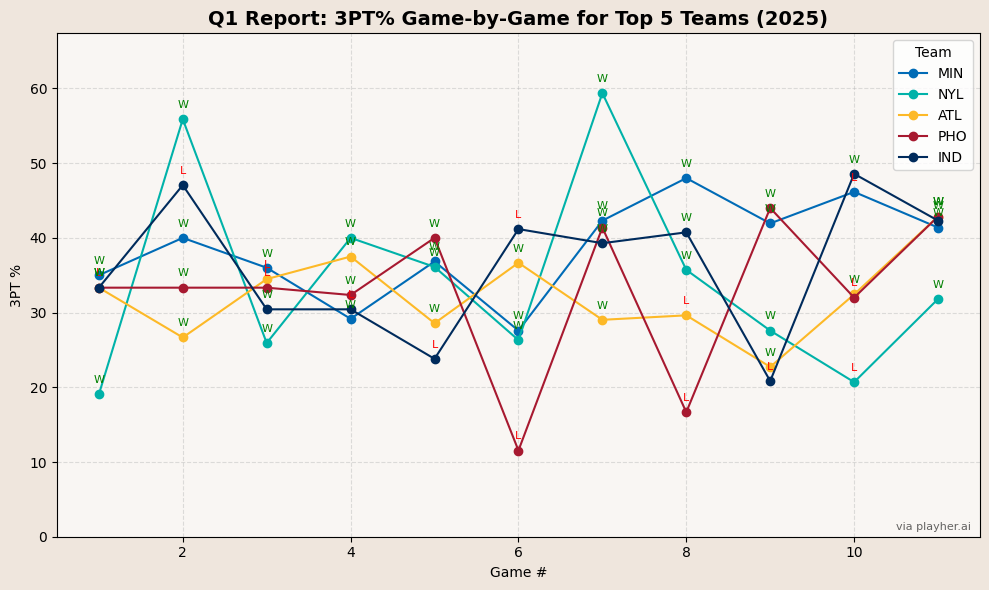

In [49]:
# Step 1: Identify top 5 teams by record after 11 games
team_records = (
    quarter1.groupby('Team')['W/L']
    .apply(lambda x: (x == 'W').sum())  # count wins
    .sort_values(ascending=False)
)

top_5_teams = team_records.head(5).index.tolist()

# Step 2: Filter data
top5_q1 = quarter1[quarter1['Team'].isin(top_5_teams)].copy()
top5_q1['ThreePCT'] = top5_q1['Tm_3P'] / top5_q1['Tm_3PA'] * 100

# Step 3: Plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#006BB6', '#00B2A9', '#FDB927', '#A71930', '#002B5C']  # adjust as needed

for i, team in enumerate(top_5_teams):
    team_data = top5_q1[top5_q1['Team'] == team]
    ax.plot(team_data['G#'], team_data['ThreePCT'], marker='o', label=team, color=colors[i])
    
    # Optional: add W/L marker above points
    for _, row in team_data.iterrows():
        result = row['W/L']
        color = 'green' if result == 'W' else 'red'
        ax.text(row['G#'], row['ThreePCT'] + 1.5, result, fontsize=8, ha='center', color=color)

# Style
ax.set_title("Q1 Report: 3PT% Game-by-Game for Top 5 Teams (2025)", fontsize=14, weight='bold')
ax.set_xlabel("Game #")
ax.set_ylabel("3PT %")
ax.set_ylim(0, top5_q1['ThreePCT'].max() + 8)
ax.legend(title="Team")
ax.grid(True, linestyle='--', alpha=0.4)
ax.set_facecolor("#F9F6F3")
fig.patch.set_facecolor("#EFE6DD")

# Watermark
ax.text(0.99, 0.01, "via playher.ai", fontsize=8, ha='right', va='bottom', transform=ax.transAxes, alpha=0.6)

plt.tight_layout()
plt.show()

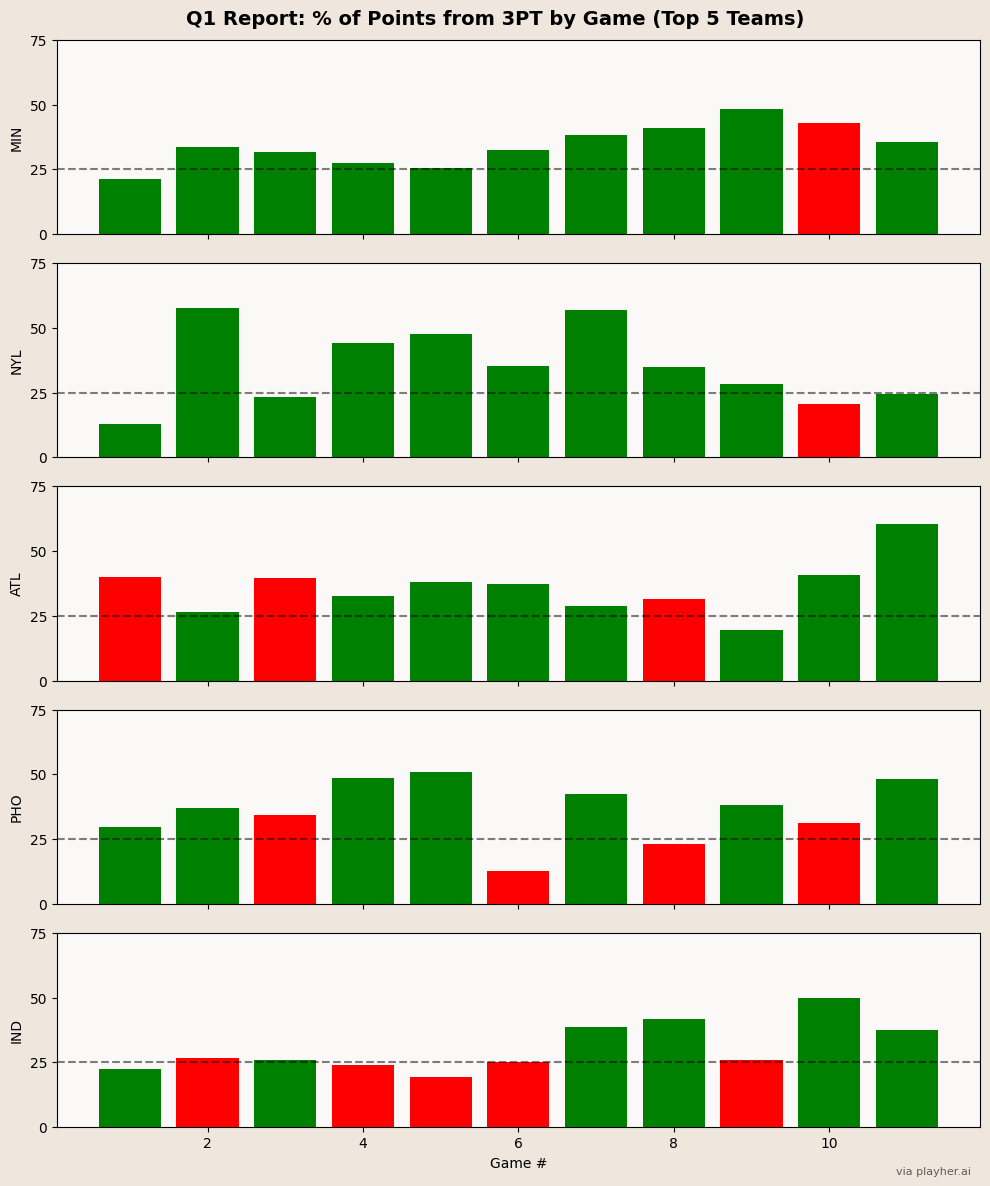

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter and prep
top5_data = quarter1[quarter1['Team'].isin(top_5_teams)].copy()
top5_data['3PT_Share'] = (top5_data['Tm_3P'] * 3) / top5_data['Tm_Pts'] * 100
top5_data['ResultColor'] = top5_data['W/L'].map({'W': 'green', 'L': 'red'})

# Plot setup
fig, axes = plt.subplots(nrows=5, figsize=(10, 12), sharex=True)

for i, team in enumerate(top_5_teams):
    team_data = top5_data[top5_data['Team'] == team]
    ax = axes[i]
    bars = ax.bar(team_data['G#'], team_data['3PT_Share'], color=team_data['ResultColor'])
    ax.axhline(25, color='black', linestyle='--', alpha=0.5)
    ax.set_ylabel(team)
    ax.set_ylim(0, 70)
    ax.set_yticks([0, 25, 50, 75])
    ax.set_facecolor("#FBF9F7")

axes[-1].set_xlabel("Game #")
fig.suptitle("Q1 Report: % of Points from 3PT by Game (Top 5 Teams)", fontsize=14, weight='bold')
fig.patch.set_facecolor("#EFE6DD")

# Watermark
axes[-1].text(0.99, -0.2, "via playher.ai", transform=axes[-1].transAxes, ha='right', va='top', fontsize=8, alpha=0.6)

plt.tight_layout()
plt.show()

# Posted June 19, 2025
🎯 Q1 Report: How Do the Top 5 Teams Score Their Wins?

Eleven games in, and the @wnba comes to the bench for the end of the first quarter.

The most amazing thing about data? Sometimes the biggest insights come from the simplest visuals.

Take this one:

Most top teams in the W are finding ways to win — even when their 3-point scoring dips below 25% of total points.

But Indiana? That’s a different story.
The Fever’s wins are all above that 25% line. Nearly every loss came in games where their 3-point production dropped — often while Caitlin Clark was sidelined.

Meanwhile, the New York Liberty — the top team after Q1 — are keeping the threes flying,
but they’ve also proven they can win in other ways when those shots aren’t falling.

Both NYL and IND are back on the court tonight.
Will the 3-ball make the difference?

Tune in. Both games are available on Amazon Prime. Watch the data play out.

#WNBA #IndianaFever #NewYorkLiberty #CaitlinClark #SabrinaIonescu #3PointEra #StatWatch #Q1Report #playherai